In [19]:
import csv
import numpy as np
import numba
from numba import njit

import numpy as np
import matplotlib.pyplot as plt


def read_ecg(filename):
    with open(filename, mode="r") as file:
        csv_reader = csv.reader(file)
        next(csv_reader)
        result = []
        for row in csv_reader:
            result.append([float(row[0]), float(row[1])])
    return np.array(result)

In [3]:
data = read_ecg("AVA02_2017-01-18.csv")
data

array([[ 5.00000000e-03, -6.96634193e+03],
       [ 1.00000000e-02, -6.86817456e+03],
       [ 1.50000000e-02, -6.83211308e+03],
       ...,
       [ 3.14459900e+04, -7.67655276e+03],
       [ 3.14459950e+04, -7.67655276e+03],
       [ 3.14460000e+04, -7.67655276e+03]])

In [15]:
def template_search(frequency, window):
    # Raise an error before entering the JIT-compiled function
    if frequency % 2 != 0:
        raise ValueError("frequency needs to be an even number")

    # Call the JIT-compiled part of the function
    return template_search_jit(frequency, window)


@njit
def template_search_jit(frequency, window):
    template_length = frequency + 1
    N = window.shape[0] - template_length
    template = np.zeros(template_length)
    current_corr_sum = 0.0
    ker = gaussian_kernel(frequency)
    kernel = np.zeros(template_length)
    bound = (len(ker) - 1) // 2

    for i in range(-bound + 1, bound + 2):
        kernel[i + frequency // 2] = ker[i - 1]

    for idi in range(N):
        segment = window[idi : idi + template_length] * kernel

        for idj in range(N):
            comparison_segment = window[idj : idj + template_length]
            corsum = np.sum(np.correlate(segment, comparison_segment))

            if corsum > current_corr_sum:
                template = comparison_segment.copy()
                current_corr_sum = corsum

    return template


@njit
def gaussian_kernel(frequency):
    size = frequency // 4
    kernel = np.exp(-0.5 * (np.arange(-size, size + 1) / (0.5 * size)) ** 2)
    return kernel / np.sum(kernel)


In [16]:
y_segment = data[:, 1][0:(20*250)]

In [17]:
template = template_search(250, y_segment)

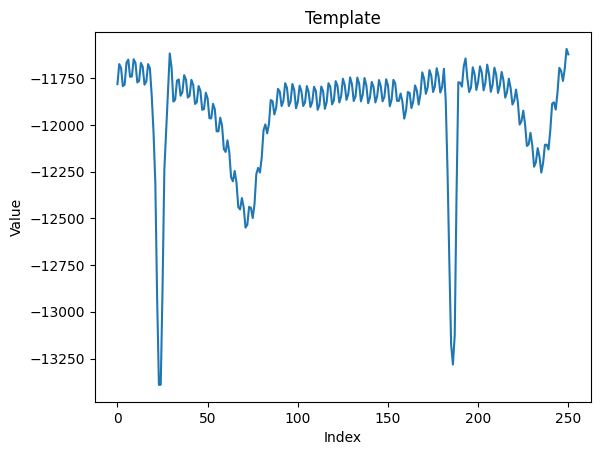

In [20]:
plt.plot(template)
plt.title("Template")
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()
